In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
df_HPC = pd.read_csv('00_data/HPC1.csv', names = ['HPC'])
df_PFC = pd.read_csv('00_data/PFC1.csv', names = ['PFC'])
df_EMG = pd.read_csv('00_data/EMG1.csv', names = ['EMG'])

df = pd.concat([df_HPC, df_PFC,df_EMG], axis=1)
df.head()

,HPC,PFC,EMG
0,-5.836571,9.003894,0.506779
1,59.422057,77.620067,0.506780
2,-42.925064,-45.459779,0.506785
3,49.265049,115.321417,0.506792
4,70.679527,80.468220,0.506802


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

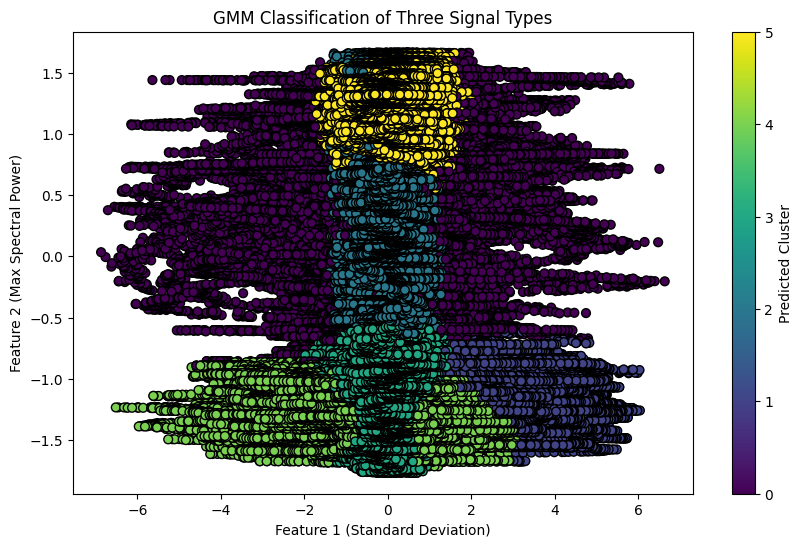

GMM Weights:
 [0.0536491  0.02341118 0.34108655 0.19652198 0.14327817 0.24205302]

GMM Means:
 [[ 0.01807773 -0.05952782  0.47404174]
 [ 0.84245071  3.34787251 -1.18974799]
 [-0.12738686 -0.07340999  0.46592319]
 [-0.06167981 -0.10926041 -1.13354431]
 [-0.10858554 -0.33160701 -1.30194804]
 [ 0.20837048  0.07783108  1.04443425]]


In [4]:
# 3. Create and Fit the GMM
# we specify n_components=3 because we have 3 types of signals
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# 4. Predict Clusters
labels = gmm.predict(X_scaled)

# 5. Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis', s=40, edgecolors='k')
plt.title("GMM Classification of Three Signal Types")
plt.xlabel("Feature 1 (Standard Deviation)")
plt.ylabel("Feature 2 (Max Spectral Power)")
plt.colorbar(label='Predicted Cluster')
plt.show()

print("GMM Weights:\n", gmm.weights_)
print("\nGMM Means:\n", gmm.means_)